In [8]:
using LinearAlgebra, Latexify
function to_latex_str(x, color = :None)
    if x < 0
        rep = replace( "-"*latexify(-x), "\$"=>"")
    else
        rep = replace( latexify(x), "\$"=>"")
    end
    if color != :None
        rep = "\\color{$color}{ $rep }"
    end
    rep
end

function pretty_print(A,B,C,Nrhs=0)
    # --------------------------------------------------------------------------------- pretty print
    matrices = [[ :none,                          (x->to_latex_str(x, "red")).( B)],
                [(x->to_latex_str(x, "red")).(A), to_latex_str.(C)] ]
    
    m1 = nM.MatrixGridLayout(matrices)

    if Nrhs == 0
        partitions = Dict()
    else
        partitions = Dict( 1 => size(B)[1] - Nrhs )
    end
    m1.array_format_string_list( partitions= partitions )
    m1.array_of_tex_entries(formater=x->x)

    m1.nm_submatrix_locs()
    m1.tex_repr()

    m1_code = m1.nm_latexdoc()

    cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)

    h = itikz.fetch_or_compile_svg( m1_code,
            prefix="test_",
            working_dir="/tmp/itikz",    # FIX: need absolute path in windows
            debug=false,
            keep_file="/tmp/itikz/foo",  # FIX: need absolute path in windows
            tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=1 );
    h
end

#include("LAcodes.jl")   # deprecated: remove....
function title( txt; sz=25, height=35, color="blue",justify="left", width=30)
    t = """<br><div style="width:$(width)cm;color:$(color);text-align:$(justify);font-size:$(sz)px;height:$(sz+10)px">$(txt)</div>"""
    display(HTML(t))
end

using PyCall
itikz=pyimport("itikz")
nM   =pyimport("itikz.nicematrix")
jinja=pyimport("jinja2");

<div style="float:center;width:100%;text-align: center;"><strong style="height:100px;color:darkred;font-size:40px;">Transpose, Dot and Matrix Products</strong></div>

# 1. The Operations

## 1.1 The Transpose

<div style="background-color:#F2F5A9">
<strong>Definition:</strong> The <strong>transpose</strong> $A^t$ of a matrix $A = \left( a_{ i j } \right)$ in $\mathbb{F}^{m \times n}$ is defined by
$$
a^t_{i j} = a_{j i}
$$
</div>

> **Example**
> $$ A = \begin{pmatrix} \color{darkred}1 & \color{darkred}2 & \color{darkred}3 \\ 4 & 5 & 6 \end{pmatrix} \; \Leftrightarrow \; A^t = \begin{pmatrix} \color{darkred}1 & 4 \\ \color{darkred}2 & 5 \\ \color{darkred}3 & 6 \end{pmatrix}$$

> **Remark:** The transpose lets us convert between **row vectors and column vectors**
>
> **Example:**
> $\qquad u = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} \; \Leftrightarrow \; u^t = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix}$

## 1.2 The Vector Dot Product

<div style="background-color:#F2F5A9">
<strong>Definition:</strong> Given two vectors $u = \begin{pmatrix} u_1\\ u_2 \\ \dots \\ u_K \end{pmatrix}$ and $v = \begin{pmatrix} v_1\\ v_2 \\ \dots \\ v_K \end{pmatrix}$ in $\mathbb{F}^n, $
$\qquad$ the dot product of $u$ and $v$ is  defined as<br><br>
$\qquad\qquad\qquad\qquad\qquad\qquad \color{darkred}{ u \cdot v = u_1 v_1 + u_2 v_2 + \dots u_K v_K}$
</div>

#### **Remarks:**

* Given two vectors, the dot product produces a **scalar**.
* Using summation notation, this is<br>
$
\qquad\qquad\qquad \boxed{\color{darkred}{ u \cdot v = \sum_{i=1}^n {u_i \; v_i} }}
$

#### **Examples**

> $\begin{pmatrix} 2 \\ 1 \\ 3 \end{pmatrix} \cdot \begin{pmatrix} 3 \\ 5\\ 4 \end{pmatrix} \; = \; 2 \times 3 + 1 \times 5 + 3 \times 4 = 23,$
$\qquad$  $\begin{pmatrix} 2 \\ 1 \\3 \end{pmatrix}\cdot \begin{pmatrix}  -3 \\ 0 \\ 2 \end{pmatrix}\;  = \; 0,$ $\qquad$ and $\qquad$  $\begin{pmatrix} 2 \\ 1 \\3 \end{pmatrix}\cdot \begin{pmatrix}  x \\ y \\ z \end{pmatrix}\;  = \; 2 x + y + 3 z.$

In [6]:
# Julia Code Example
# --------------------------------
u = [1 2 3]; v = [5 -1 2]
@show u, v
@show u_dot_v  = dot( u, v)
@show u_dot_v == 1*5 + 2*(-1) + 3*2;

(u, v) = ([1 2 3], [5 -1 2])
u_dot_v = dot(u, v) = 9
u_dot_v == 1 * 5 + 2 * -1 + 3 * 2 = true


## 1.3 The Matrix Product

The **matrix product** systematically computes all dot products between a set of vectors $a_1, a_2, \dots a_M$ and $b_1, b_2, \dots b_N$:<br>
$\qquad$ the computation can be listed in a table (spreadsheet format):

$ $   | $\color{darkred}{b_1}  $  | $ \color{darkred}{b_2} $ | $\dots $ |
------|-----------------       |------------------    | --- |
$\color{darkred}{a_1}$ | $a_1 \cdot b_1$        | $a_1 \cdot b_2$      | $\dots $ |
$\color{darkred}{a_2}$ | $a_2 \cdot b_1$        | $a_2 \cdot b_2$      | $\dots $ |
$\dots $ |  $\dots $ |  $\dots $ |  $\dots $ |

#### **Computational Layout**

To lay this out in a spreadsheet, **the $a_i$ vectors are entered as horizontal rows**,<br>
while **the $b_i$ vectors are entered as vertical columns**.

> Thus the computations for $$a_1 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}, a_2 = \begin{pmatrix} 3 \\ 4 \end{pmatrix}  \quad \text{ and } \quad
b_1 = \begin{pmatrix} 5 \\ 1 \end{pmatrix}, b_2 = \begin{pmatrix} 3 \\ -2 \end{pmatrix}, b_3 = \begin{pmatrix} -1 \\ 0 \end{pmatrix}$$
> can be set up in terms of the matrices
>
> $$A = \left( \begin{array}{cc} a^t_1 \\ a^t_2 \end{array} \right) = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}, \quad 
B = \begin{pmatrix} b_1 & b_2 & b_3 \end{pmatrix} = \begin{pmatrix} 5 & 3 & -1 \\ 1 & -2 & 0 \end{pmatrix}
$$
>
> with the computation laid out as follows: $\qquad\qquad\qquad
\boxed{ \begin{align}
& \left( B \right) \\
\left( A \right)\; & \left( C \right) 
\end{align} }$

<div style="float:left;width:45%;padding:0.5cm;height:2.4cm;border:2px solid black;">

$$\text{Column Vectors } b_i \; \rightarrow$$  |                      | $\color{darkred}{b_1}\;\; $ | $ \color{darkred}{b_2}\;\; $ | $\color{darkred}{b_3}\;\; $ |
:-----                                          |------                |----------------     |------------------    | ------------------  |
$$\text{row vector} \quad a^t_1 \quad \rightarrow$$  | $\color{darkred}{a^t_1}$ | $a_1 \cdot b_1$     | $a_1 \cdot b_2$      | $a_1 \cdot b_3 $    |
$$\text{row vector} \quad a^t_2 \quad \rightarrow$$  | $\color{darkred}{a^t_2}$ | $a_2 \cdot b_1$     | $a_2 \cdot b_2$      | $a_1 \cdot b_3 $    |
</div>
<div style="float:right;width:40%;height:2.9cm;border:2px solid black;padding-left:1cm;padding-top:0.5cm;">
<img src="Figs/mat_mult_ex1.svg">
</div>
<!--
<br>

$ $   | $\; \color{darkred}{\begin{matrix} 5 \\ 1 \end{matrix}}  $  | $\; \color{darkred}{\begin{matrix} 3 \\ -2 \end{matrix}} $ | $\; \color{darkred}{\begin{matrix} -1 \\ 0 \end{matrix}}$ |
------|-----------------       |------------------    | --- |
$\color{darkred}{\begin{matrix} 1 & 2 \end{matrix}}$ | $7$        | $-1$      | $-1$ |
$\color{darkred}{\begin{matrix} 3 & 4 \end{matrix}}$ | $19$        | $1$      | $-3$ |
-->

#### **Code Example**

HTML{String}("<br><div style=\"width:30cm;color:blue;text-align:left;font-size:15px;height:25px\">Dot products dot( a_i, b_j )</div>")

  Top left entry in the result: the dot product dot( [1 2], [5 1]) = 7



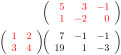

In [12]:
# Look at the following matrix
A  = [ 1 2; 3 4]
B  = [ 5 3 -1; 1 -2 0]
C  = A*B

title( "Dot products dot( a_i, b_j )", sz=15, height=20)
    println( "  Top left entry in the result: the dot product dot( [1 2], [5 1]) = $( dot( A[1,:], B[:,1]) )")
    println()
    pretty_print( A, B, C )

#### **Remarks**

<div style="float:left;">
<strong> Add a $b_3$ vector:<br>$\quad$ extra column in $B$ and $C$</strong>

$ $   | $\color{darkred}{b_1}  $  | $ \color{darkred}{b_2} $ | $\color{darkred}{b_3} $ |
------|-----------------       |------------------    | --- |
$\color{darkred}{a^t_1}$ | $a_1 \cdot b_1$        | $a_1 \cdot b_2$      | $a_1 \cdot b_3$ |
$\color{darkred}{a^t_2}$ | $a_2 \cdot b_1$        | $a_2 \cdot b_2$      | $a_2 \cdot b_3$ |
</div>
<div style="float:left;padding-left:2cm;">
<strong> Remove the $b_3$ vector:<br>$\quad$ one less column in $B$ and $C$</strong>

$ $   | $\color{darkred}{b_1}  $  | $ \color{darkred}{b_2} $ |
------|-----------------       |------------------    |
$\color{darkred}{a^t_1}$ | $a_1 \cdot b_1$        | $a_1 \cdot b_2$      |
$\color{darkred}{a^t_2}$ | $a_2 \cdot b_1$        | $a_2 \cdot b_2$      |
</div><div style="float:left;padding-left:2cm;padding-top:1.3cm;">
<img src="Figs/mat_mult_ex1_v.svg">
</div>

<hr>
<div style="float:left;">
<strong> Add an $a_3$ vector:<br>$\quad$ extra row in $A$ and $C$</strong>

$ $   | $\color{darkred}{b_1}  $  | $ \color{darkred}{b_2} $ | $\color{darkred}{b_3} $ |
------|-----------------       |------------------    | --- |
$\color{darkred}{a^t_1}$ | $a_1 \cdot b_1$        | $a_1 \cdot b_2$      | $a_1 \cdot b_3$ |
$\color{darkred}{a^t_2}$ | $a_2 \cdot b_1$        | $a_2 \cdot b_2$      | $a_2 \cdot b_3$ |
$\color{darkred}{a^t_3}$ | $a_3 \cdot b_1$        | $a_3 \cdot b_2$      | $a_3 \cdot b_3$ |
</div>
<div style="float:left;padding-left:2cm;">
<strong> Remove the $a_3$ vector:<br>$\quad$ one less row in $A$ and $C$</strong>

$ $   | $\color{darkred}{b_1}  $  | $ \color{darkred}{b_2} $ | $ \color{darkred}{b_3} $ |
------|-----------------          |------------------        | ---                      |
$\color{darkred}{a^t_1}$ | $a_1 \cdot b_1$        | $a_1 \cdot b_2$      | $a_1 \cdot b_3$ |
$\color{darkred}{a^t_2}$ | $a_2 \cdot b_1$        | $a_2 \cdot b_2$      | $a_2 \cdot b_3$ |
</div>
<div style="float:left;padding-left:2cm;padding-top:1.5cm;">
<img src="Figs/mat_mult_ex3.svg">
</div>

#### **Definition**

<div style="background-color:#F2F5A9">
<strong>Definition:</strong> Given two matrices $A = \left( a_{m k} \right) \in \mathbb{F}^{M\times K}$
    and $B =  \left( b_{k n} \right) \in \mathbb{F}^{K \times N}, $<br>
    $\qquad$ the <strong>matrix product</strong> of $A$ and $B$ is a matrix $C \in \mathbb{F}^{M \times N}$<br>
$\qquad$ defined as
$$
\color{darkred}{ C_{i j} = \left( A B \right)_{i j} =  \sum_{\color{blue}{k=1}}^K  { a_{i \color{blue}k} \; b_{\color{blue}k j} }} 
   \qquad\qquad\qquad\qquad\qquad\qquad
$$
</div>

<div style="float:left;width:60%;height:7cm;">

**Remark:**
* each **row of the product matrix** $C$ is computed using the **corresponding row** of $A$.<br>
<text style="margin-left: 1cm;">No other rows of $A$ enter: we could delete them, and still have a valid matrix product with the same result as before.</text>

* each **column of the product matrix** $C$ is computed using the **corresponding column** of $B$.<br>
<text style="margin-left: 1cm;">**No other columns of $B$ enter**: we could delete them, and still have a valid matrix product with the same result as before.</text>
</div>
<div style="float:right;width:30%;height:2.9cm;padding-left:1cm;padding-top:2cm;">
<img src="Figs/mat_mult_ex1.svg">
</div>
<!-- =================================================================================================
<div style="float:right;width:25%;height:5cm;padding:1cm;">

$ $   | $\; \color{darkred}{\begin{matrix} 5 \\ 1 \end{matrix}}  $  | $\; \color{darkred}{\begin{matrix} 3 \\ -2 \end{matrix}} $ | $\; \color{darkred}{\begin{matrix} -1 \\ 0 \end{matrix}}$ |
------|-----------------       |------------------    | --- |
$\color{darkred}{\begin{matrix} 1 & 2 \end{matrix}}$ | $7$        | $-1$      | $-1$ |
$\color{darkred}{\begin{matrix} 3 & 4 \end{matrix}}$ | $19$        | $1$      | $-3$ |
</div>
-->

<strong>Remark:</strong>
* Note the **matrix sizes** in the product: the <strong style="color:darkred;">inner indices</strong> are summed over.
$$\boxed{C_{M \times N} = A_{M \times \color{darkred}{K}} B_{\color{darkred}{K}\times  N}}$$

# 2. Special Cases

## 2.1 Inner and Outer Products

### 2.1.1 Inner Product: Row Vector Times Column Vector

<div style="float:left;width:60%;">
Let $u$ and $v$ be column vectors of size $K \times 1$.

**The inner product is defined by** $u^t v$ and yields a $1 \times 1$ matrix.

$$ u^t \ v = \left( \sum_{k=1}^K {u_{\color{darkred}1 k} v_{k \color{darkred}1}} \right) = u \cdot v \; I_{\color{darkred}1 \times \color{darkred}1} \; \color{darkgreen}{ = \; u \cdot v }$$

**Remark:**
Some computer languages (MATLAB, julia) **automatically convert** <br>
$\qquad$ between vectors and column vectors, and between $1\times 1$ matrices and scalars.
</div>
<div style="float:right;width:30%;height:2.9cm;padding-left:1cm;padding-top:1.5cm;">
    <img src="Figs/mat_mult_ex4.svg">
</div>

### 2.1.2 Outer Product: Column Vector Times Row Vector

<div style="float:left;width:60%;">

Let $u \in \mathbb{F}^M$ and $v \in \mathbb{F}^N$ be two **column vectors**.
$$
\color{darkred}{\left(u \ v^t \right)_{i j} } =  \sum_{\color{darkgreen}{k=1}}^{\color{darkgreen}1} {u_{i \color{darkgreen}k} v^t_{\color{darkgreen}k j}} = \color{darkred}{ u_{i \color{darkgreen}1} v_{\color{darkgreen}1 j} }
$$
</div>
<div style="float:right;width:30%;height:2.9cm;padding-left:1cm;padding-top:0cm;">
    <img src="Figs/mat_mult_ex5.svg">
</div>

HTML{String}("<br><div style=\"width:30cm;color:blue;text-align:left;font-size:15px;height:25px\">Column Vector Times Row Vector</div>")

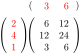

In [14]:
u = reshape([2; 4; 1],3,1);  v=reshape([ 3; 6],2,1); c = u*v'
title("Column Vector Times Row Vector",sz=15,height=10)

pretty_print(u,v',c)

## 2.2 Matrix Times Column Vector, Row Vector Times Matrix

### 2.2.1 Matrix Times Column Vector

Consider
$$
A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ \end{pmatrix}, \quad
x = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}
$$
$\qquad$ and the matrix product $A x$.

* If we look at the product of each of the rows of $A$ with the column $x$,
we see they produce inner products:
$$\small{
\begin{align}
                                                        & \left(  \qquad\quad\;\; \color{darkred}{\begin{matrix} x_1 \\ x_2 \\ x_3 \end{matrix}}\qquad\quad \right)  & \\
\begin{pmatrix}  \color{darkred}1 &  \color{darkred}2 &  \color{darkred}3 \\ \hline 4 & 5 & 6 \\ \end{pmatrix} & \left( \begin{matrix}  \color{darkred}{1 x_1 + 2 x_2 + 3 x_3} \\ \hline 4 x_1 + 5 x_2 + 6 x_3 \end{matrix}  \right) & \\
\end{align}}
$$<br>

* If we look at the product of each of the columns of $A$ with each row in $x$, we see they produce outer products:
$$\small{
\begin{align}
    & \left(   \begin{array}{c}  \qquad\qquad\quad \color{darkred}{x_1} \qquad\qquad\qquad \\ \hline
                                 \qquad\qquad\quad  x_2                 \qquad\qquad\qquad \\ \hline
                                 \qquad\qquad\quad \color{magenta}{x_3}  \qquad\qquad\qquad \end{array} \right) \\
\left(\begin{array}{c|c|c}  \color{darkred}1 &   2 & \color{magenta}3 \\  \color{darkred}4 &  5 & \color{magenta}6 \\ \end{array}\right)
& 
\left( \begin{array}{c|c|c}
x_1 \color{darkred}{ \begin{pmatrix} 1\\4\end{pmatrix} } +
x_2 \begin{pmatrix} 2\\5\end{pmatrix} +
x_3 \color{magenta}{  \begin{pmatrix} 3\\ 6 \end{pmatrix}} \end{array} \; \right)  \\
\end{align}}
$$

An easy way to see this is to realize the sum in the definition of the matrix product can be split into its individual components:
$$
c_{i j} = \sum_{k=\color{darkred}1}^K{a_{i k} b_{k j}} = a_{i \color{darkred}1} b_{\color{darkred}1 j} + \sum_{k=\color{darkred}2}^K{a_{i k} b_{k j}} \cdots
$$

### 2.2.2 Row Vector Times Matrix

If we look at the product of a row vector $u^t$ times a matrix $B$ we see linear combinations of the rows of $B$:
$$\small{\begin{align}
                                               & \left( \begin{array}{c} \;\;\qquad\qquad a_1+a_2 \;\;\qquad\qquad \\ \hline
                                                                         \qquad b_1 + b_2 \qquad  \\ \hline
                                                                         \qquad c_1+c_2   \qquad   \end{array}\ \right) \\
    \left( \begin{array}{c|c|c}
                    3 & 4 & 2             \\
                    \end{array} \right)
                                               & \left( \begin{matrix}  3 (a_1+a_2) + 4 (b_1+b_2) + 2 (c_1+c_2) \end{matrix} \right) \\
\end{align}}$$

# 3. Submatrices

The general rule: we can break up matrices in a product into submatrices. Consider the **product** $C = A B$.<br> The **computational layout** is

$$\begin{align}
& \left( \quad B \quad \right) \\
\left( \begin{matrix} A \end{matrix} \right)
& \left( \begin{matrix} A B \quad \end{matrix} \right) \\
\end{align}$$

## 3.1 We can partition the $A$ and $C$ matrices horizontally

$$\begin{align}
& \left( \;\;\quad B \quad\; \right) \\
\left( \begin{matrix} A_1 \\ \hline A_2 \end{matrix} \right)
& \left( \begin{matrix} A_1 B \\ \hline A_2 B\end{matrix} \right) \\
\end{align}$$

> <p style="color:darkred;"> Draw a dividing line <strong>horizontally</strong> through the $A$ and $C$ matrices<br>
$\quad$ and rename the resulting submatrices</p>

## 3.2 We can partition the $B$ and $C$ matrices vertically

$$\begin{align}
                                               & \left( \begin{array}{c|c} \; B_1 \; & B_2 \;\ \end{array}\ \right) \\
\left( \begin{matrix} A \end{matrix} \right)
                                               & \left( \begin{array}{c|c} A B_1  & A B_2 \end{array} \right) \\
\end{align}$$

> <p style="color:darkred;"> Draw a dividing line <strong>vertically</strong> through the $B$ and $C$ matrices<br>
$\quad$ and rename the resulting submatrices</p>

## 3.3 We can partition the $A$ matrix vertically, and the $B$ matrix horizontally

$$\small{\begin{align}
                                               & \left( \begin{matrix} \quad\; B_1 \quad \\ \hline  \quad \; B_2  \quad  \end{matrix}\ \right) \\
    \left( \begin{array}{c|c} A_1 & A_2 \end{array} \right)
                                               & \left( \begin{matrix} A_1 B_1 + A_2 B_2 \end{matrix} \right) \\
\end{align}}$$

> <p style="color:darkred;"> Draw a dividing line <strong>vertically</strong> through $A$ and <strong>horizontally</strong> through $B$<br>
$\quad$ such that the number of columns in $A_1$ is the same as the number of rows in $B_1,$<br>
$\quad$ and rename the resulting submatrices</p>

**Remark:**
* the **sizes of the submatrices must be consistent**, i.e., the matrix products must exist!
* The order of the matrices in the product must be the same: a **matrix on the left**, i.e., $A_{i}$ **must stay on the left!**

## 3.4 We can partition further, horizontally and vertically...

> <p style="color:darkred;"> Just keep drawing dividing lines in accordance with the rules given above.</p>

#### **Important Example**

> As an example, consider dividing a row of $A$ in $C = A B$ such as to isolate each of the entries in the row:
> $$\small{
A = \left( \begin{array}{c|c|c} \dots & \dots & \dots \\ \hline
                    3 & 4 & 2             \\ \hline
                     \dots & \dots & \dots \\
                    \end{array} \right),}
$$
> $\qquad$ and consider the matrix multiplication $C = A B$.

> $$\small{\begin{align}
                                               & \left( \begin{matrix} \qquad\; R_1 \qquad \\ \hline  \qquad \; R_2  \qquad  \\ \hline  \qquad \; R_3  \qquad   \end{matrix}\ \right) \\
    \left( \begin{array}{c|c|c} \dots & \dots & \dots \\ \hline
                    \color{red}3 & \color{red}4 & \color{red}2             \\ \hline
                     \dots & \dots & \dots \\
                    \end{array} \right)
                                               & \left( \begin{matrix} \dots \\ \color{red}3 R_1 + \color{red}4 R_2 + \color{red}2 R_3 \\ \dots \end{matrix} \right) \\
\end{align}}$$

> If we subdivide the first matrix into columns and rows,<br>
$\qquad$ we see that **each row of the result is a linear combinations of the rows of the second matrix!**

> The entries in the corresponding row of the first matrix<br>
$\qquad$ **are the multipliers of that linear combination!**<br>
$\qquad$ <text style="color:red;">Think of the entries in a row of $A$ as an <strong>instruction set</strong></text><br>
$\qquad$ <text style="color:red;">that describes **how to produce a new row from the rows of $B$!**</text><br>

## 3.5 Test Your Understanding

**Question:** what do the **entries in a column of the second matrix** $B$ do?<br>
$\qquad$ Could they be described as an instruction set for the rows or columns of the first matrix $A$?

## 3.6 Notation Convention

Unless otherwise stated, we will automatically convert a vector $u$ to a **column vector**.
* $u^t \quad$ is the corresponding row vector
* $u^t v \quad$ is the inner product of the vectors $u$ and $v$
* $u \ v^t \quad$ is the outer product of the vectors $u$ and $v$

# 4. Take Away

* We have seen definitions for
    * the **transpose of a matrix**
    * the **dot product of two vectors**
    * the generalization of this dot product to the **matrix product** (special cases inner and outer products)

* Partitioning of the matrices in the matrix product $A B$
    * **entries of each of the rows of $A$ describe how to construct a new row from the rows of $B$**
    * Partitioning lets us see which entries in the matrices affect which entries in the result